In [175]:
import numpy as np
import matplotlib.pyplot as plt
import math

R1 = 1084404.0887794495 N
R2 = -896575.228282571 N
M3 = -20421991.310880784 Nm


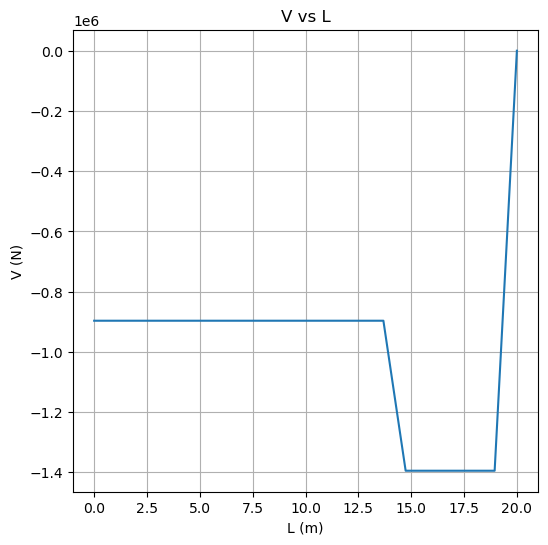

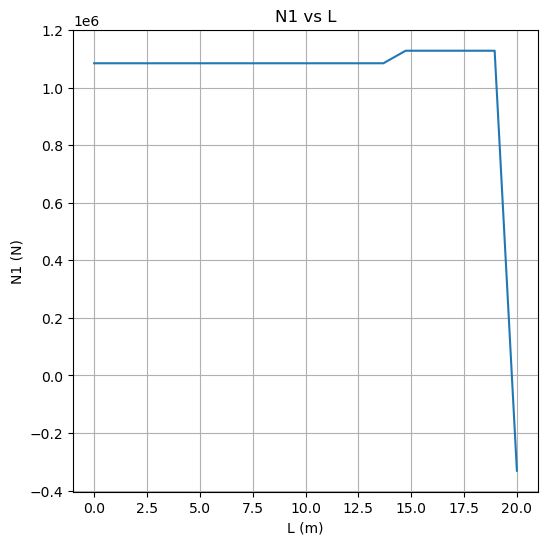

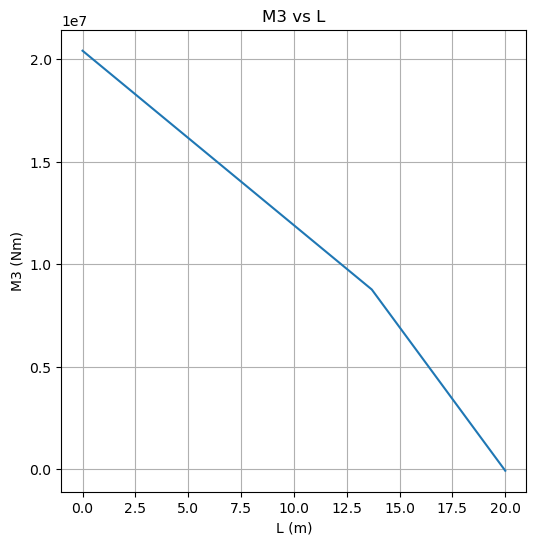

In [176]:
#EAE 135 Project 2
#Andrew Matel
#Nicholas Rusali

### Given Info
## Lengths
D = 3 #m
t_layers = 0.005 #m
L = 20 #m
Ri = 1.490 #m
Ra = 1.495 #m
Rc = 1.5 #m
## Forces
Thrust = 1250*(10**3) #N
Lift = 1400*(10**3) #N
Weight = 500*(10**3) #N
alf = math.radians(5) #rads

## Material Properties
#CFRP
E11_cfrp = 148.24*(10**9) #Pa
E22_cfrp = 10.07*(10**9) #Pa
G12_cfrp = 5.58*(10**9) #Pa
v12_cfrp = 0.30 
#Al 6061
syc_Al = -289.6 #MPa (yield stress in compression)
syt_Al = 289.6 #MPa
Ec_Al = 69.69*(10**9) #Pa
Et_Al = 68.95*(10**9) #Pa
G_Al = 26.2*(10**9) #Pa
v_Al = 0.33

### Reactions at Cantilever
R1 = Thrust - (Lift+Weight)*(math.sin(alf))
R2 = (Weight - Lift)*math.cos(alf)
M3 = (Weight*(L-5)-Lift*L)*math.cos(alf)

print('R1 = {} N'.format(R1))
print('R2 = {} N'.format(R2))
print('M3 = {} Nm'.format(M3))

### Internal Force Calculations
Shear = np.zeros(20)
for i in range(0,len(Shear)):
    if (i<14):
        Shear[i] = R2
    elif (i>=14) & (i<19):
        Shear[i] = R2 - Weight*(math.cos(alf))
    else:
        Shear[i] = R2 - (Weight - Lift)*math.cos(alf)

plt.figure(figsize = [6,6])
plt.title('V vs L')
plt.xlabel('L (m)')
plt.ylabel('V (N)')
plt.plot(np.linspace(0,20,20), Shear)
plt.grid()

N1 = np.zeros(20)
for i in range(0,len(N1)):
    if (i<14):
        N1[i] = R1
    elif (i>=14) & (i<19):
        N1[i] = R1 + Weight*(math.sin(alf))
    else:
        N1[i] = R1 - Thrust - (Lift+Weight)*(math.sin(alf))

plt.figure(figsize = [6,6])
plt.title('N1 vs L')
plt.xlabel('L (m)')
plt.ylabel('N1 (N)')
plt.plot(np.linspace(0,20,20), N1)
plt.grid()

Mom = np.zeros(20)
for i in range(0,len(Mom)):
    if (i<14):
        Mom[i] = -M3 + ((M3+(-M3+(R2*15)))/15)*i
    elif (i>=14):
        Mom[i] = Mom[13] - ((Mom[13]+(R2-Weight*math.cos(alf)))/5)*(i-13)

plt.figure(figsize = [6,6])
plt.title('M3 vs L')
plt.xlabel('L (m)')
plt.ylabel('M3 (Nm)')
plt.plot(np.linspace(0,20,20), Mom)
plt.grid()


In [177]:
###Axial Problem
x1 = np.linspace(0,20,20)
##Stiffness

#Al
A_Al = (math.pi)*((Ra**2)-(Ri**2))

#CFRP
#There is a different area occupied by each of the 8 layers:
t_cfrp_layers = (Rc-Ra)/8 #radial thickness of layers
A_0_1 = (math.pi)*(-(Ra**2)+(Ra+t_cfrp_layers)**2)
A_45_1 = (math.pi)*(-((Ra+t_cfrp_layers)**2)+(Ra+2*t_cfrp_layers)**2)
A_neg45_1 = (math.pi)*(-((Ra+2*t_cfrp_layers)**2)+(Ra+3*t_cfrp_layers)**2)
A_90_1 = (math.pi)*(-((Ra+3*t_cfrp_layers)**2)+(Ra+4*t_cfrp_layers)**2)
A_90_2 = (math.pi)*(-((Ra+4*t_cfrp_layers)**2)+(Ra+5*t_cfrp_layers)**2)
A_neg45_2 = (math.pi)*(-((Ra+5*t_cfrp_layers)**2)+(Ra+6*t_cfrp_layers)**2)
A_45_2 = (math.pi)*(-((Ra+6*t_cfrp_layers)**2)+(Ra+7*t_cfrp_layers)**2)
A_0_2 = (math.pi)*(-((Ra+7*t_cfrp_layers)**2)+(Ra+8*t_cfrp_layers)**2)

#axial stiffness
S = Ec_Al*A_Al + E11_cfrp*(A_0_1 + A_0_2) +E22_cfrp*(A_45_1+A_45_2+A_neg45_1+A_neg45_2+A_90_1+A_90_2)

##Displacement
#Displacement in axial direction due to the axial forces (using govering eqn)
#(d/dx1[S*(du1/dx1)]=-p1=0)

#Boundary Conditions
C1 = R1 #When x1 = 0, N1 = R1 
C2 = 0 #no displacement at root
u1 = (C1*x1)/S + C2

##Strain
#Axial strain due to axial load only N1 = axialstrain*S
axial_strain1 = np.zeros(len(N1))
for i in range(0, len(axial_strain1)):
    axial_strain1[i] = (N1[i])/S

##Stress
#Axial Stress due to axial load only
#stress = E*(N1)/S
axial_stress_Al = (Ec_Al*N1)/S
print(axial_stress_Al)
#--> Continued after Bending Section (needed to find Ex1x1 in that section)



[14082319.08904197 14082319.08904197 14082319.08904197 14082319.08904197
 14082319.08904197 14082319.08904197 14082319.08904197 14082319.08904197
 14082319.08904197 14082319.08904197 14082319.08904197 14082319.08904197
 14082319.08904197 14082319.08904197 14648231.27644271 14648231.27644271
 14648231.27644271 14648231.27644271 14648231.27644271 -4300932.62424565]


In [178]:
#Bending Problem
v21_cfrp = E22_cfrp*(v12_cfrp/(E11_cfrp)) #relationship between v21 and v12

Q = np.array([[(E11_cfrp)/(1-v12_cfrp*v21_cfrp), (v21_cfrp*E11_cfrp)/(1-v12_cfrp*v21_cfrp), 0],
     [(v12_cfrp*E22_cfrp)/(1-v12_cfrp*v21_cfrp), E22_cfrp/(1-v12_cfrp*v21_cfrp), 0],
     [0,0,G12_cfrp]])

def makeTmatrix(beta):
        #This function takes each of the angles of the CFRP and produces a rotation matrix T
        T = np.array([[(math.cos(beta))**2,(math.sin(beta))**2, 2*math.sin(beta)*math.cos(beta)],
                      [(math.sin(beta))**2, (math.cos(beta))**2, -2*math.sin(beta)*math.cos(beta)],
                      [-math.sin(beta)*math.cos(beta), math.sin(beta)*math.cos(beta), (math.cos(beta))**2 - (math.sin(beta))**2 ]])
        return T

T_0 = makeTmatrix(0)
T_neg45 = makeTmatrix(-((math.pi)/4))
T_45 = makeTmatrix((math.pi)/4)
T_90 = makeTmatrix(((math.pi)/2))

R = np.array([[1,0,0],[0,1,0],[0,0,2]]) #Reuter's Matrix
def makeQbar(T, R, Q):
        #This function transforms Q into Qbar using the T and R matrices
        Qbar = np.matmul(np.linalg.inv(T), Q)
        Qbar = np.matmul(Qbar,R)
        Qbar = np.matmul(Qbar,T)
        Qbar = np.matmul(Qbar,np.linalg.inv(R))
        return Qbar

Qbar_0 = makeQbar(T_0, R, Q)
Qbar_neg45 = makeQbar(T_neg45, R, Q)
Qbar_45 = makeQbar(T_45, R, Q)
Qbar_90 = makeQbar(T_90, R, Q)

#Here, we define the Sbar matrix which is the inverse of the Qbar matrix
Sbar_0 = np.linalg.inv(Qbar_0)
Sbar_neg45 = np.linalg.inv(Qbar_neg45)
Sbar_45 = np.linalg.inv(Qbar_45)
Sbar_90 = np.linalg.inv(Qbar_90)

#All we have to do to solve for Ex1x1 is to take the (1,1) term of each Sbar matrix and divde 1 by it
Ex1x1_0 = 1/(Sbar_0[0,0])
Ex1x1_neg45 = 1/(Sbar_neg45[0,0])
Ex1x1_45 = 1/(Sbar_45[0,0])
Ex1x1_90 = 1/(Sbar_90[0,0])


#H33c = w*sum(Ex1x1*(x2i+1**3-x2i**3)/3)
#To allow for this equation to function for circular cross-sections, I have taken the average circumference of each layer to be the width w
#The Modulus-Weighted Centroid is at the center of the tube

Ex1x1_cfrp = [Ex1x1_0, Ex1x1_45, Ex1x1_neg45, Ex1x1_90, Ex1x1_90, Ex1x1_neg45, Ex1x1_45, Ex1x1_0]

layer_H33c = np.zeros(8)
for i in range(0, len(layer_H33c)):
        layer_H33c[i] = (2*math.pi)*((Ri + i*t_cfrp_layers + Ri + (i+1)*t_cfrp_layers)/2)*(Ex1x1_cfrp[i])*((((Ri+(i+1)*t_cfrp_layers)**3)-((Ri+(i)*t_cfrp_layers)**3))/3)

H33c = sum(layer_H33c)
#Not exactly sure how to incorporate Aluminum
print(Ex1x1_0)


## This is essentially what I am doing with this loop (not sure if it's correct)
#cfrp_0 = ((Ri+Ri+t_cfrp_layers)/2)*(Ex1x1_0)*(-(Ri**3)+(Ri+t_cfrp_layers)**3)/3
#cfrp_45 = ((Ri+t_cfrp_layers+Ri+2*t_cfrp_layers)/2)*(Ex1x1_45)*((-(Ri+t_cfrp_layers)**3)+((Ri+2*t_cfrp_layers)**3))/3
#cfrp_neg45 = ((Ri+2*t_cfrp_layers+Ri+3*t_cfrp_layers)/2)*(Ex1x1_neg45)*(-((Ri+2*t_cfrp_layers)**3)+((Ri+3*t_cfrp_layers)**3))/3
#cfrp_90 = ((Ri+3*t_cfrp_layers+Ri+4*t_cfrp_layers)/2)*(Ex1x1_90)*(-((Ri+3*t_cfrp_layers)**3)+((Ri+4*t_cfrp_layers)**3))/3
#cfrp_902 = ((Ri+4*t_cfrp_layers+Ri+5*t_cfrp_layers)/2)*(Ex1x1_90)*(-((Ri+4*t_cfrp_layers)**3)+((Ri+5*t_cfrp_layers)**3))/3
#cfrp_neg452 = ((Ri+5*t_cfrp_layers+Ri+6*t_cfrp_layers)/2)*(Ex1x1_neg45)*(-((Ri+5*t_cfrp_layers)**3)+((Ri+6*t_cfrp_layers)**3))/3
#cfrp_452 = ((Ri+6*t_cfrp_layers+Ri+7*t_cfrp_layers)/2)*(Ex1x1_45)*(-((Ri+6*t_cfrp_layers)**3)+((Ri+7*t_cfrp_layers)**3))/3
#cfrp_02 = ((Ri+7*t_cfrp_layers+Ri+8*t_cfrp_layers)/2)*(Ex1x1_0)*(-((Ri+7*t_cfrp_layers)**3)+((Ri+8*t_cfrp_layers)**3))/3
#H33c = (2*math.pi)*(cfrp_0 +cfrp_45+cfrp_neg45+cfrp_90+cfrp_902+cfrp_neg452+cfrp_452+cfrp_02)


        



148240000000.00003


In [179]:
#Finishing Axial Stress due to axial load only
axial_stress_cfrp = np.zeros((8,20))
for i in range(0, len(axial_stress_cfrp)):
    for j in range(0, L):
        axial_stress_cfrp[i,j] = (Ex1x1_cfrp[i]*N1[j])/S

print(axial_stress_cfrp)


[[29954986.10646552 29954986.10646552 29954986.10646552 29954986.10646552
  29954986.10646552 29954986.10646552 29954986.10646552 29954986.10646552
  29954986.10646552 29954986.10646552 29954986.10646552 29954986.10646552
  29954986.10646552 29954986.10646552 31158757.4174181  31158757.4174181
  31158757.4174181  31158757.4174181  31158757.4174181  -9148661.96323972]
 [ 2874257.98462193  2874257.98462193  2874257.98462193  2874257.98462193
   2874257.98462193  2874257.98462193  2874257.98462193  2874257.98462193
   2874257.98462193  2874257.98462193  2874257.98462193  2874257.98462193
   2874257.98462193  2874257.98462193  2989762.93895131  2989762.93895131
   2989762.93895131  2989762.93895131  2989762.93895131  -877837.65290324]
 [ 2874257.98462193  2874257.98462193  2874257.98462193  2874257.98462193
   2874257.98462193  2874257.98462193  2874257.98462193  2874257.98462193
   2874257.98462193  2874257.98462193  2874257.98462193  2874257.98462193
   2874257.98462193  2874257.98462193

In [180]:
# Axial Stress due to bending
# sigma1(0,x2,x3) = -((Ex1x2)_ith * x2 * M3(0))/H33c
sigma1_total = []
y_span = np.linspace(Ri,Rc,100)

for x2 in y_span:
    if x2 <= Ra:
        # calculate axial stress of aluminum due to axial load
        # assume core bending is negligable
        sigma1_total.append(-axial_stress_Al[0])
    # calculate axial stress of CFRP in bending and add axial stress due to axial load
    elif x2 > Ra and x2 < Ra + t_cfrp_layers:
        # 0 deg
        sigma1_total.append(-axial_stress_cfrp[0,0] - (Ex1x1_cfrp[0] * (Ra + 0*t_cfrp_layers/2) * Mom[0])/H33c)
    elif x2 > Ra + t_cfrp_layers and x2 < Ra + 2*t_cfrp_layers:
        # +45 deg
        sigma1_total.append(-axial_stress_cfrp[1,0] - (Ex1x1_cfrp[1] * (Ra + 1*t_cfrp_layers + t_cfrp_layers/2) * Mom[0])/H33c)
    elif x2 > Ra + 2*t_cfrp_layers and x2 < Ra + 3*t_cfrp_layers:
        # -45 deg
        sigma1_total.append(-axial_stress_cfrp[2,0] - (Ex1x1_cfrp[2] * (Ra + 2*t_cfrp_layers + t_cfrp_layers/2) * Mom[0])/H33c)
    elif x2 > Ra + 3*t_cfrp_layers and x2 < Ra + 4*t_cfrp_layers:
        # 90 deg
        sigma1_total.append(-axial_stress_cfrp[3,0] - (Ex1x1_cfrp[3] * (Ra + 3*t_cfrp_layers + t_cfrp_layers/2) * Mom[0])/H33c)
    elif x2 > Ra + 4*t_cfrp_layers and x2 < Ra + 5*t_cfrp_layers:
        # 90 deg
        sigma1_total.append(-axial_stress_cfrp[4,0] - (Ex1x1_cfrp[4] * (Ra + 4*t_cfrp_layers + t_cfrp_layers/2) * Mom[0])/H33c)
    elif x2 > Ra + 5*t_cfrp_layers and x2 < Ra + 6*t_cfrp_layers:
        # -45 deg
        sigma1_total.append(-axial_stress_cfrp[5,0] - (Ex1x1_cfrp[5] * (Ra + 5*t_cfrp_layers + t_cfrp_layers/2) * Mom[0])/H33c)
    elif x2 > Ra + 6*t_cfrp_layers and x2 < Ra + 7*t_cfrp_layers:
        # +45 deg
        sigma1_total.append(-axial_stress_cfrp[6,0] - (Ex1x1_cfrp[6] * (Ra + 6*t_cfrp_layers + t_cfrp_layers/2) * Mom[0])/H33c)
    elif x2 > Ra + 7*t_cfrp_layers and x2:
        # 0 deg
        sigma1_total.append(-axial_stress_cfrp[7,0] - (Ex1x1_cfrp[7] * (Ra + 7*t_cfrp_layers + t_cfrp_layers/2) * Mom[0])/H33c)

# due to axial load only
sigma1_axial = []

for x2 in y_span:
    if x2 <= Ra:
        # calculate axial stress of aluminum due to axial load
        # assume core bending is negligable
        sigma1_axial.append(-max(axial_stress_Al))
    # calculate axial stress of CFRP in bending and add axial stress due to axial load
    elif x2 > Ra and x2 < Ra + t_cfrp_layers:
        # 0 deg
        sigma1_axial.append(-max(axial_stress_cfrp[0]))
    elif x2 > Ra + t_cfrp_layers and x2 < Ra + 2*t_cfrp_layers:
        # +45 deg
        sigma1_axial.append(-max(axial_stress_cfrp[1]))
    elif x2 > Ra + 2*t_cfrp_layers and x2 < Ra + 3*t_cfrp_layers:
        # -45 deg
        sigma1_axial.append(-max(axial_stress_cfrp[2]))
    elif x2 > Ra + 3*t_cfrp_layers and x2 < Ra + 4*t_cfrp_layers:
        # 90 deg
        sigma1_axial.append(-max(axial_stress_cfrp[3]))
    elif x2 > Ra + 4*t_cfrp_layers and x2 < Ra + 5*t_cfrp_layers:
        # 90 deg
        sigma1_axial.append(-max(axial_stress_cfrp[4]))
    elif x2 > Ra + 5*t_cfrp_layers and x2 < Ra + 6*t_cfrp_layers:
        # -45 deg
        sigma1_axial.append(-max(axial_stress_cfrp[5]))
    elif x2 > Ra + 6*t_cfrp_layers and x2 < Ra + 7*t_cfrp_layers:
        # +45 deg
        sigma1_axial.append(-max(axial_stress_cfrp[6]))
    elif x2 > Ra + 7*t_cfrp_layers and x2:
        # 0 deg
        sigma1_axial.append(-max(axial_stress_cfrp[7]))


# due to bending load only
sigma1_bend = []

for x2 in y_span:
    if x2 <= Ra:
        # calculate axial stress of aluminum due to axial load
        # assume core bending is negligable
        sigma1_bend.append(0)
    # calculate axial stress of CFRP in bending and add axial stress due to axial load
    elif x2 > Ra and x2 < Ra + t_cfrp_layers:
        # 0 deg
        sigma1_bend.append(- (Ex1x1_cfrp[0] * (Ra + 0*t_cfrp_layers/2) * Mom[0])/H33c)
    elif x2 > Ra + t_cfrp_layers and x2 < Ra + 2*t_cfrp_layers:
        # +45 deg
        sigma1_bend.append(- (Ex1x1_cfrp[1] * (Ra + 1*t_cfrp_layers + t_cfrp_layers/2) * Mom[0])/H33c)
    elif x2 > Ra + 2*t_cfrp_layers and x2 < Ra + 3*t_cfrp_layers:
        # -45 deg
        sigma1_bend.append(- (Ex1x1_cfrp[2] * (Ra + 2*t_cfrp_layers + t_cfrp_layers/2) * Mom[0])/H33c)
    elif x2 > Ra + 3*t_cfrp_layers and x2 < Ra + 4*t_cfrp_layers:
        # 90 deg
        sigma1_bend.append(- (Ex1x1_cfrp[3] * (Ra + 3*t_cfrp_layers + t_cfrp_layers/2) * Mom[0])/H33c)
    elif x2 > Ra + 4*t_cfrp_layers and x2 < Ra + 5*t_cfrp_layers:
        # 90 deg
        sigma1_bend.append(- (Ex1x1_cfrp[4] * (Ra + 4*t_cfrp_layers + t_cfrp_layers/2) * Mom[0])/H33c)
    elif x2 > Ra + 5*t_cfrp_layers and x2 < Ra + 6*t_cfrp_layers:
        # -45 deg
        sigma1_bend.append(- (Ex1x1_cfrp[5] * (Ra + 5*t_cfrp_layers + t_cfrp_layers/2) * Mom[0])/H33c)
    elif x2 > Ra + 6*t_cfrp_layers and x2 < Ra + 7*t_cfrp_layers:
        # +45 deg
        sigma1_bend.append(- (Ex1x1_cfrp[6] * (Ra + 6*t_cfrp_layers + t_cfrp_layers/2) * Mom[0])/H33c)
    elif x2 > Ra + 7*t_cfrp_layers and x2:
        # 0 deg
        sigma1_bend.append(- (Ex1x1_cfrp[7] * (Ra + 7*t_cfrp_layers + t_cfrp_layers/2) * Mom[0])/H33c)

# due to bending in tension
sigma1_ten = []

for x2 in y_span:
    if x2 <= Ra:
        # calculate axial stress of aluminum due to axial load
        # assume core bending is negligable
        sigma1_ten.append(0)
    # calculate axial stress of CFRP in bending and add axial stress due to axial load
    elif x2 > Ra and x2 < Ra + t_cfrp_layers:
        # 0 deg
        sigma1_ten.append( (Ex1x1_cfrp[0] * (Ra + 0*t_cfrp_layers/2) * Mom[0])/H33c)
    elif x2 > Ra + t_cfrp_layers and x2 < Ra + 2*t_cfrp_layers:
        # +45 deg
        sigma1_ten.append( (Ex1x1_cfrp[1] * (Ra + 1*t_cfrp_layers + t_cfrp_layers/2) * Mom[0])/H33c)
    elif x2 > Ra + 2*t_cfrp_layers and x2 < Ra + 3*t_cfrp_layers:
        # -45 deg
        sigma1_ten.append( (Ex1x1_cfrp[2] * (Ra + 2*t_cfrp_layers + t_cfrp_layers/2) * Mom[0])/H33c)
    elif x2 > Ra + 3*t_cfrp_layers and x2 < Ra + 4*t_cfrp_layers:
        # 90 deg
        sigma1_ten.append( (Ex1x1_cfrp[3] * (Ra + 3*t_cfrp_layers + t_cfrp_layers/2) * Mom[0])/H33c)
    elif x2 > Ra + 4*t_cfrp_layers and x2 < Ra + 5*t_cfrp_layers:
        # 90 deg
        sigma1_ten.append( (Ex1x1_cfrp[4] * (Ra + 4*t_cfrp_layers + t_cfrp_layers/2) * Mom[0])/H33c)
    elif x2 > Ra + 5*t_cfrp_layers and x2 < Ra + 6*t_cfrp_layers:
        # -45 deg
        sigma1_ten.append( (Ex1x1_cfrp[5] * (Ra + 5*t_cfrp_layers + t_cfrp_layers/2) * Mom[0])/H33c)
    elif x2 > Ra + 6*t_cfrp_layers and x2 < Ra + 7*t_cfrp_layers:
        # +45 deg
        sigma1_ten.append( (Ex1x1_cfrp[6] * (Ra + 6*t_cfrp_layers + t_cfrp_layers/2) * Mom[0])/H33c)
    elif x2 > Ra + 7*t_cfrp_layers and x2:
        # 0 deg
        sigma1_ten.append( (Ex1x1_cfrp[7] * (Ra + 7*t_cfrp_layers + t_cfrp_layers/2) * Mom[0])/H33c)

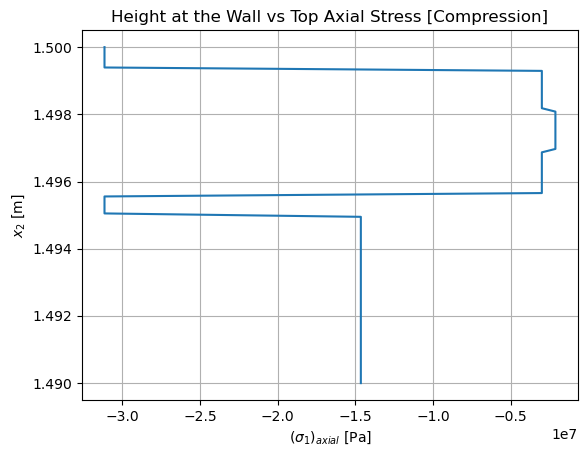

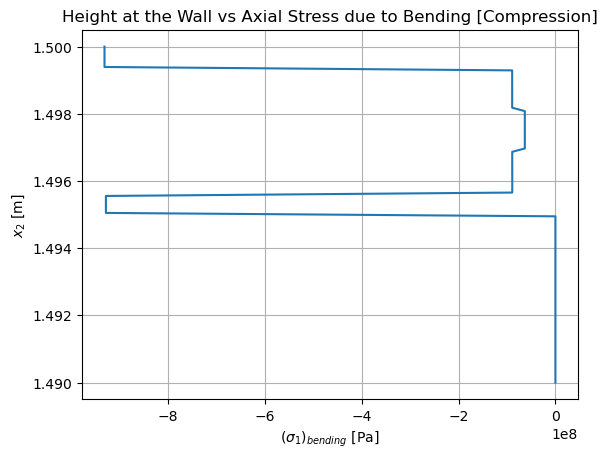

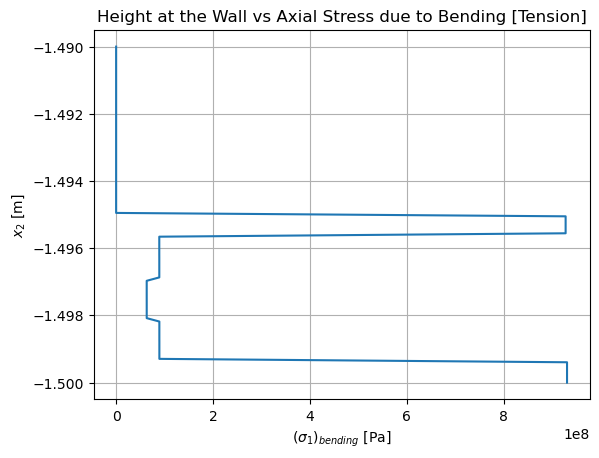

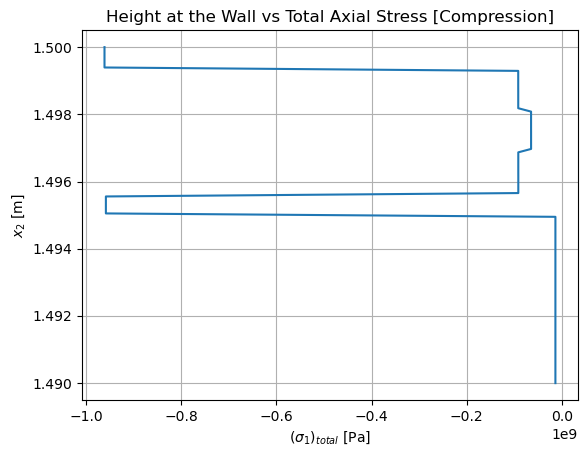

In [181]:
# Plot of the total axial stress at the wall vs X2

plt.figure()
plt.title('Height at the Wall vs Top Axial Stress [Compression]')
plt.xlabel('$(\\sigma_1)_{axial}$ [Pa]')
plt.ylabel('$x_2$ [m]')
plt.plot(sigma1_axial, y_span)
plt.grid()
plt.show()

plt.figure()
plt.title('Height at the Wall vs Axial Stress due to Bending [Compression]')
plt.xlabel('$(\\sigma_1)_{bending}$ [Pa]')
plt.ylabel('$x_2$ [m]')
plt.plot(sigma1_bend, y_span)
plt.grid()
plt.show()

plt.figure()
plt.title('Height at the Wall vs Axial Stress due to Bending [Tension]')
plt.xlabel('$(\\sigma_1)_{bending}$ [Pa]')
plt.ylabel('$x_2$ [m]')
plt.plot(sigma1_ten, -y_span)
plt.grid()
plt.show()

plt.figure()
plt.title('Height at the Wall vs Total Axial Stress [Compression]')
plt.xlabel('$(\\sigma_1)_{total}$ [Pa]')
plt.ylabel('$x_2$ [m]')
plt.plot(sigma1_total, y_span)
plt.grid()
plt.show()


In [182]:
# Calculate the factor of safety along the wall position
ksi2pa = 6.895e6 # ksi to pa conversion
XT = 310*ksi2pa # axial tensile strength [Pa]
XC = -184*ksi2pa # axial compressive strength [Pa]
YT = 7.75*ksi2pa # transverse tensile strength [Pa]
YC = -24.4*ksi2pa # transverse compressive strength [Pa]
sigmaS_al = 289.6e6 #Pa

# calculate the FoS based on the max axial stress
# assume YT and YC for both 90 and 45 deg layer configurations
FoS_max = []

for x2 in y_span:
    if x2 <= Ra:
        # calculate axial stress of aluminum due to axial load
        # assume core bending is negligable
        FoS_max.append(sigmaS_al/max(axial_stress_Al))
    # calculate axial stress of CFRP in bending and add axial stress due to axial load
    elif x2 > Ra and x2 < Ra + t_cfrp_layers:
        # 0 deg
        FoS_max.append(XC/(-max(axial_stress_cfrp[0]) - (Ex1x1_cfrp[0] * (Ra + 0*t_cfrp_layers/2) * Mom[0])/H33c))
    elif x2 > Ra + t_cfrp_layers and x2 < Ra + 2*t_cfrp_layers:
        # +45 deg
        FoS_max.append(YC/(-max(axial_stress_cfrp[1]) - (Ex1x1_cfrp[1] * (Ra + 1*t_cfrp_layers + t_cfrp_layers/2) * Mom[0])/H33c))
    elif x2 > Ra + 2*t_cfrp_layers and x2 < Ra + 3*t_cfrp_layers:
        # -45 deg
        FoS_max.append(YC/(-max(axial_stress_cfrp[2]) - (Ex1x1_cfrp[2] * (Ra + 2*t_cfrp_layers + t_cfrp_layers/2) * Mom[0])/H33c))
    elif x2 > Ra + 3*t_cfrp_layers and x2 < Ra + 4*t_cfrp_layers:
        # 90 deg
        FoS_max.append(YC/(-max(axial_stress_cfrp[3]) - (Ex1x1_cfrp[3] * (Ra + 3*t_cfrp_layers + t_cfrp_layers/2) * Mom[0])/H33c))
    elif x2 > Ra + 4*t_cfrp_layers and x2 < Ra + 5*t_cfrp_layers:
        # 90 deg
        FoS_max.append(YC/(-max(axial_stress_cfrp[4]) - (Ex1x1_cfrp[4] * (Ra + 4*t_cfrp_layers + t_cfrp_layers/2) * Mom[0])/H33c))
    elif x2 > Ra + 5*t_cfrp_layers and x2 < Ra + 6*t_cfrp_layers:
        # -45 deg
        FoS_max.append(YC/(-max(axial_stress_cfrp[5]) - (Ex1x1_cfrp[5] * (Ra + 5*t_cfrp_layers + t_cfrp_layers/2) * Mom[0])/H33c))
    elif x2 > Ra + 6*t_cfrp_layers and x2 < Ra + 7*t_cfrp_layers:
        # +45 deg
        FoS_max.append(YC/(-max(axial_stress_cfrp[6]) - (Ex1x1_cfrp[6] * (Ra + 6*t_cfrp_layers + t_cfrp_layers/2) * Mom[0])/H33c))
    elif x2 > Ra + 7*t_cfrp_layers and x2:
        # 0 deg
        FoS_max.append(XC/(-max(axial_stress_cfrp[7]) - (Ex1x1_cfrp[7] * (Ra + 7*t_cfrp_layers + t_cfrp_layers/2) * Mom[0])/H33c))

AeroFOS = np.ones(100)*1.5
AstroFOS = np.ones(100)*1.25

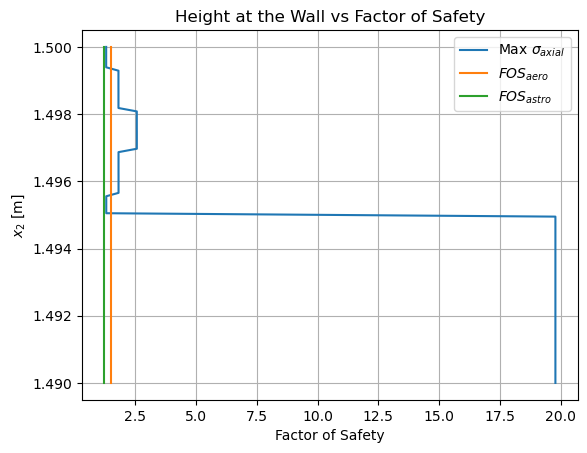

In [183]:
# plot the FoS along the height
plt.figure()
plt.title('Height at the Wall vs Factor of Safety')
plt.xlabel('Factor of Safety')
plt.ylabel('$x_2$ [m]')
plt.plot(FoS_max, y_span,label='Max $\\sigma_{axial}$')
plt.plot(AeroFOS, y_span,label='$FOS_{aero}$')
plt.plot(AstroFOS, y_span, label='$FOS_{astro}$')
plt.legend()
plt.grid()
plt.show()